In [6]:
# importing the libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
import plotly.express as px
import seaborn as sns
from warnings import filterwarnings
filterwarnings('ignore')

Loading the dataset

In [2]:
df = pd.read_csv('IRIS.csv') #loading dataset
df.head() #displaying first five rows of the dataset

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
df.shape # checking the number of rows and columns

(150, 5)

In [4]:
df.info() #detailed description of the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [5]:
df.describe(include='all') # five point summary of all numeric and categorical features

,sepal_length,sepal_width,petal_length,petal_width,species
count,150.000000,150.000000,150.000000,150.000000,150
unique,NaN,NaN,NaN,NaN,3
top,NaN,NaN,NaN,NaN,Iris-setosa
freq,NaN,NaN,NaN,NaN,50
mean,5.843333,3.054000,3.758667,1.198667,NaN
std,0.828066,0.433594,1.764420,0.763161,NaN
min,4.300000,2.000000,1.000000,0.100000,NaN
25%,5.100000,2.800000,1.600000,0.300000,NaN
50%,5.800000,3.000000,4.350000,1.300000,NaN
75%,6.400000,3.300000,5.100000,1.800000,NaN


checking for distribution for all the features in the dataset

In [7]:
%matplotlib inline
plt.rcParams['figure.figsize'] = (10, 8)

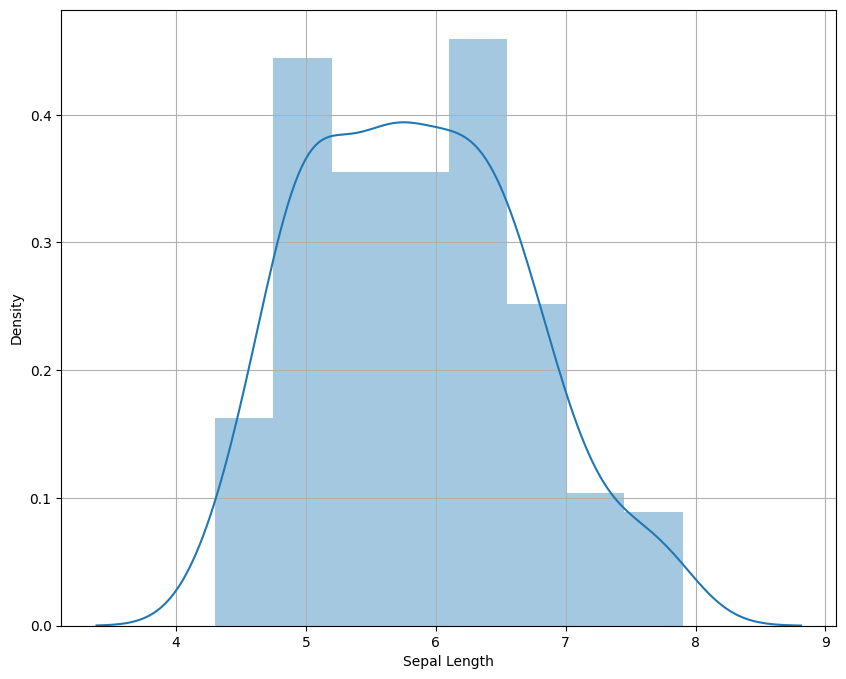

In [16]:
# sepal length distribution
sns.distplot(df['sepal_length'])
plt.xlabel("Sepal Length")
plt.grid()
plt.show()

From the distribution we can infer that the data seems to be fairly normalized

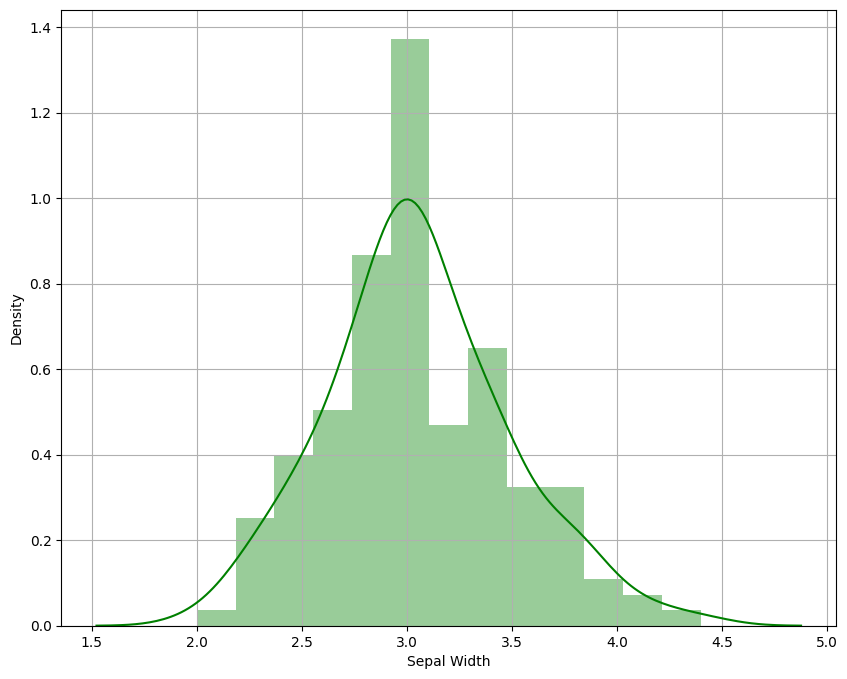

In [18]:
# sepal width distribution
sns.distplot(df['sepal_width'], color='green')
plt.xlabel("Sepal Width")
plt.grid()
plt.show()

From the distribution we can infer that the data seems to be fairly normalized

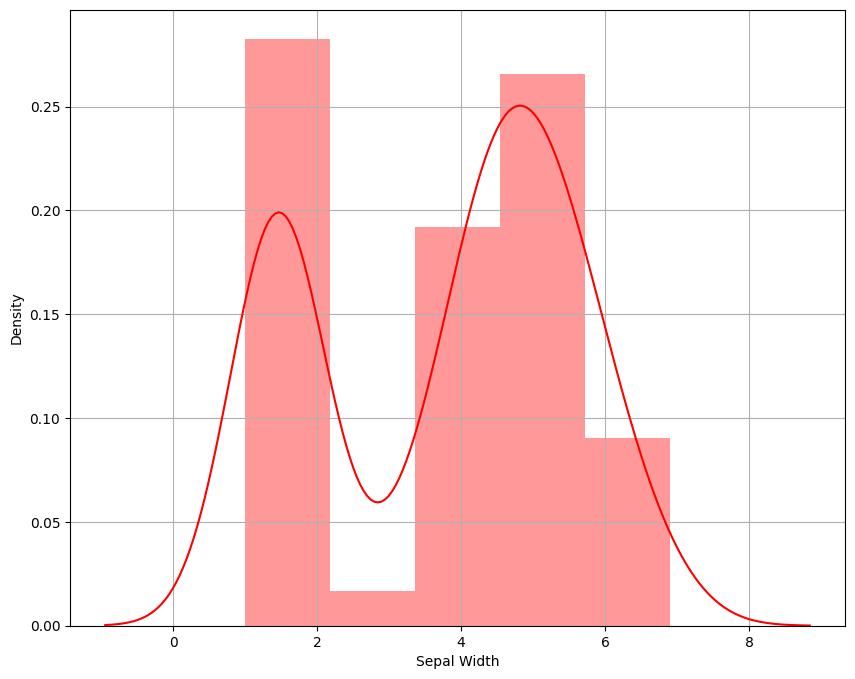

In [19]:
# petal length distribution
sns.distplot(df['petal_length'], color='red')
plt.xlabel("Sepal Width")
plt.grid()
plt.show()

there are two bells in the data

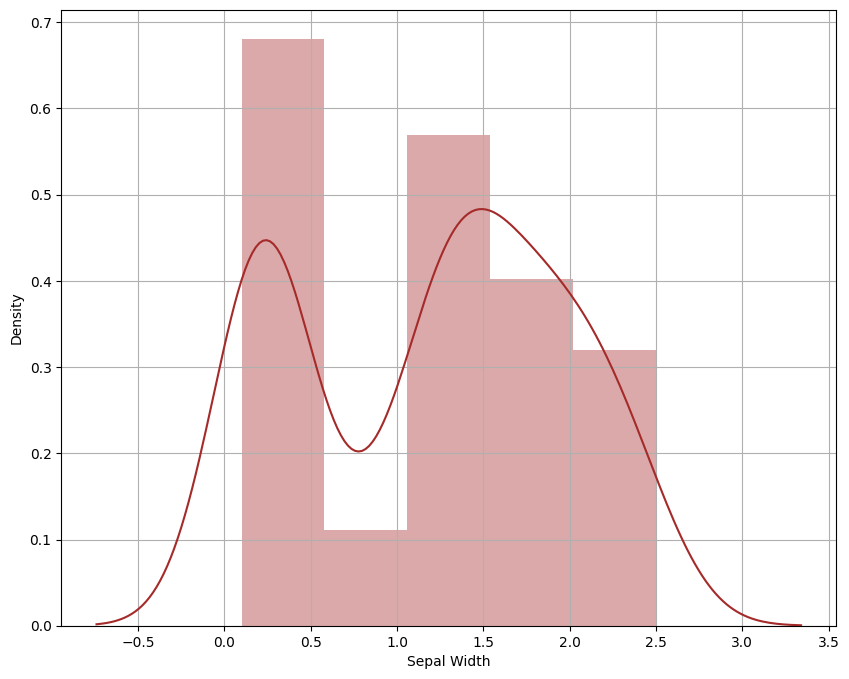

In [20]:
# petal width distribution
sns.distplot(df['petal_width'], color='brown')
plt.xlabel("Sepal Width")
plt.grid()
plt.show()

In [21]:
# checking for multicollinearity in the predictor features of the dataset
df.corr()

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.109369,0.871754,0.817954
sepal_width,-0.109369,1.000000,-0.420516,-0.356544
petal_length,0.871754,-0.420516,1.000000,0.962757
petal_width,0.817954,-0.356544,0.962757,1.000000


<AxesSubplot: >

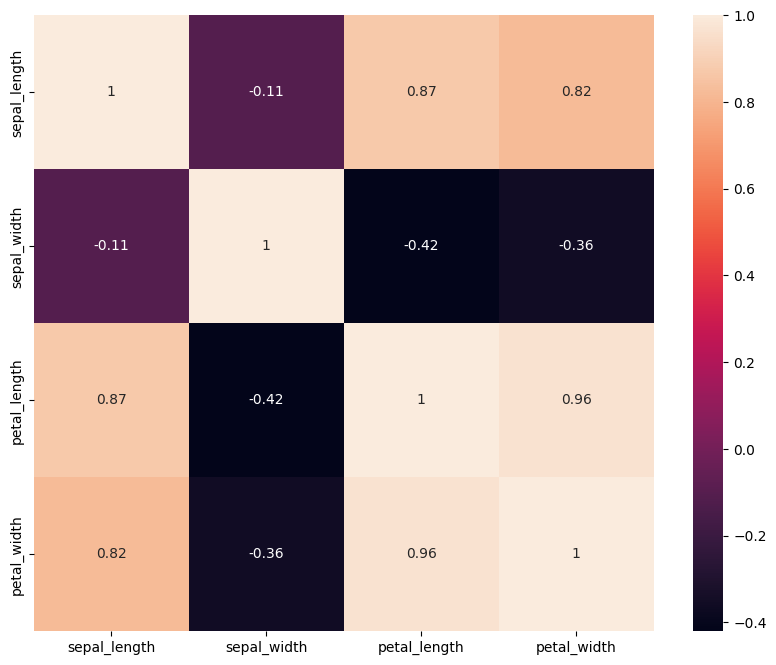

In [24]:
sns.heatmap(df.corr(), annot=True)

 There is a strong correlation b/w (sepal_length, petal_length), (sepal_length, petal_width), (petal_length, petal_width)

In [25]:
# checking the relationship amonght all the predictors and target variable that is Species

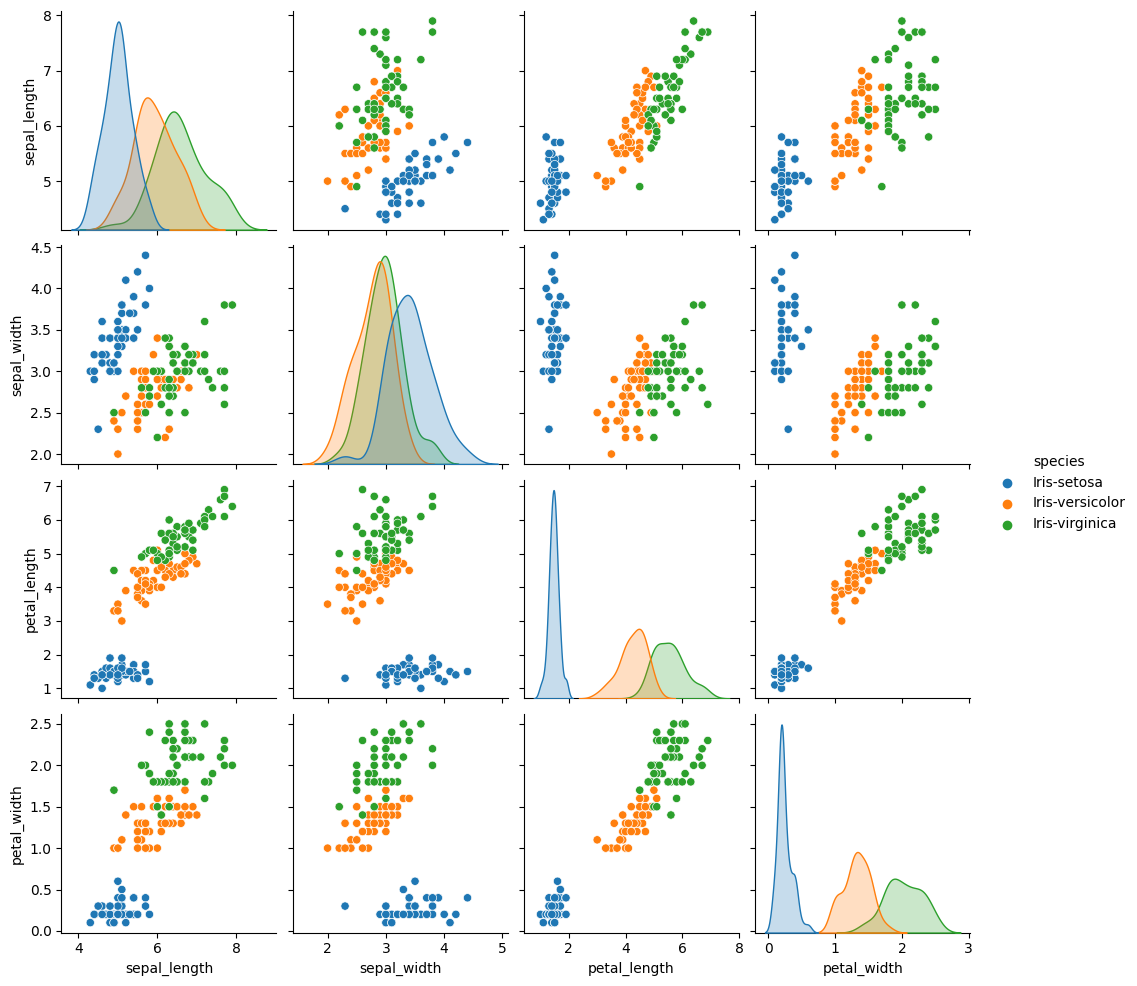

In [27]:
sns.pairplot(df, hue= 'species')

from the plot we can determine how the increase or decrease in the parameters determines the species of the flower

model building

using decision tree classifier to predict the species of the flower

In [30]:
from sklearn.model_selection import train_test_split

# import various function from statsmodels
from sklearn.preprocessing import StandardScaler
import statsmodels
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [33]:
#  scaling the data to make a uniform scale for all the features in the dataset
ss = StandardScaler()

In [34]:
df1={}

In [37]:
df['scaled_sepal_length'] = ss.fit_transform(df[['sepal_length']])
df['scaled_sepal_width'] = ss.fit_transform(df[['sepal_width']])
df['scaled_petal_length'] = ss.fit_transform(df[['petal_length']])
df['scaled_petal_width'] = ss.fit_transform(df[['petal_width']])

In [38]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species,scaled_sepal_length,scaled_sepal_width,scaled_petal_length,scaled_petal_width
0,5.1,3.5,1.4,0.2,Iris-setosa,-0.900681,1.032057,-1.341272,-1.312977
1,4.9,3.0,1.4,0.2,Iris-setosa,-1.143017,-0.124958,-1.341272,-1.312977
2,4.7,3.2,1.3,0.2,Iris-setosa,-1.385353,0.337848,-1.398138,-1.312977
3,4.6,3.1,1.5,0.2,Iris-setosa,-1.506521,0.106445,-1.284407,-1.312977
4,5.0,3.6,1.4,0.2,Iris-setosa,-1.021849,1.263460,-1.341272,-1.312977


<AxesSubplot: xlabel='species', ylabel='count'>

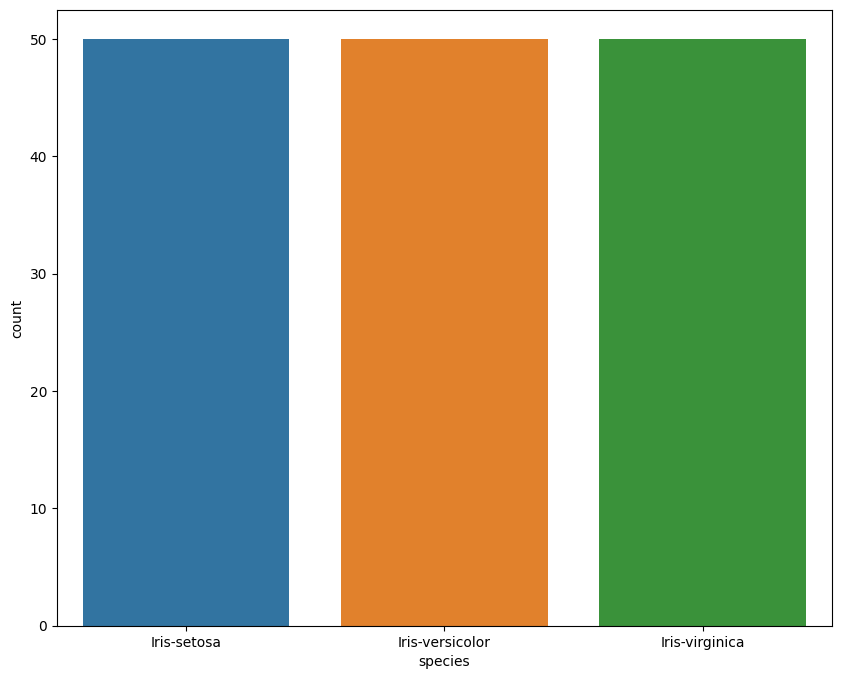

In [40]:
# checking if there is any even distribution of species in dataset
sns.countplot(data=df, x= 'species')

from the above plot, the species are evenly distributed and there isn't any bias

In [42]:
# doing the label encoding on the target feature
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['species'] = le.fit_transform(df['species'])

In [43]:
# storing all the scaled features in the dataframe x and the target feature in the dataframe y
X = df.drop(['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species'], axis=1)
y = df['species']

In [44]:
# performing the train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [45]:
from sklearn.tree import DecisionTreeClassifier
dc = DecisionTreeClassifier()

# building the model on train data
dc.fit(X_train, y_train)

DecisionTreeClassifier()

In [46]:
y_pred_train = dc.predict(X_train)
y_pred_train

array([1, 2, 1, 2, 2, 0, 1, 0, 1, 2, 2, 0, 2, 2, 1, 2, 0, 0, 0, 1, 0, 0,
       2, 2, 2, 2, 2, 1, 2, 1, 0, 2, 2, 0, 0, 2, 0, 2, 2, 1, 1, 2, 2, 0,
       1, 1, 2, 1, 2, 1, 0, 0, 0, 2, 0, 1, 2, 2, 0, 0, 1, 0, 2, 1, 2, 2,
       1, 2, 2, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 2, 2, 2, 0, 0, 1, 0, 2, 0,
       2, 2, 0, 2, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 2, 0,
       0, 2, 1, 2, 1, 2, 2, 1, 2, 0])

In [47]:
y_pred_test = dc.predict(X_test)
y_pred_test

array([0, 1, 1, 0, 2, 1, 2, 0, 0, 2, 1, 0, 2, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       2, 0, 2, 1, 0, 0, 1, 2])

Classification report of the model

In [48]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [49]:
cl_report = classification_report(y_pred_test,y_test)
print('classification report : \n', cl_report)

classification report : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       0.92      1.00      0.96        12
           2       1.00      0.86      0.92         7

    accuracy                           0.97        30
   macro avg       0.97      0.95      0.96        30
weighted avg       0.97      0.97      0.97        30



confusion matrix

In [50]:
cm = confusion_matrix(y_pred_test, y_test)
print('confusion matrix: \n', cm)

confusion matrix: 
 [[11  0  0]
 [ 0 12  0]
 [ 0  1  6]]


accuracy score

In [51]:
accs_train = accuracy_score(y_train, y_pred_train)
print('accuracy score for train set is: \n', accs_train,'.')

accuracy score for train set is: 
 1.0 .


In [52]:
accs_test = accuracy_score(y_test, y_pred_test)
print('accuracy score for train set is: \n', accs_test,'.')

accuracy score for train set is: 
 0.9666666666666667 .
